/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


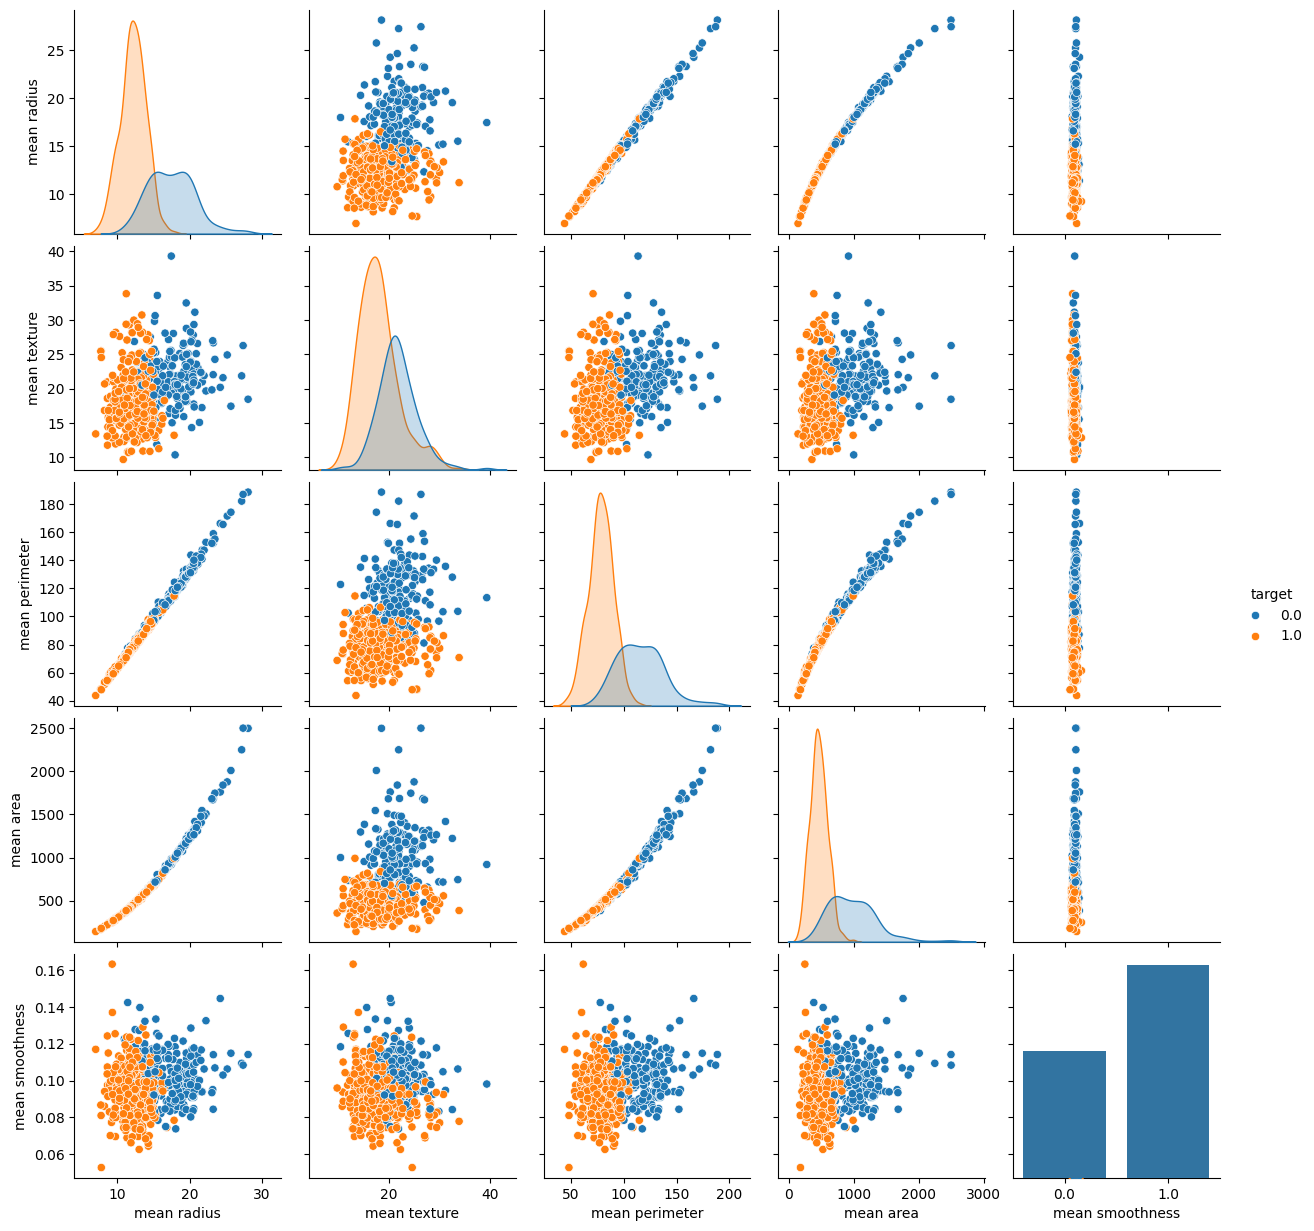

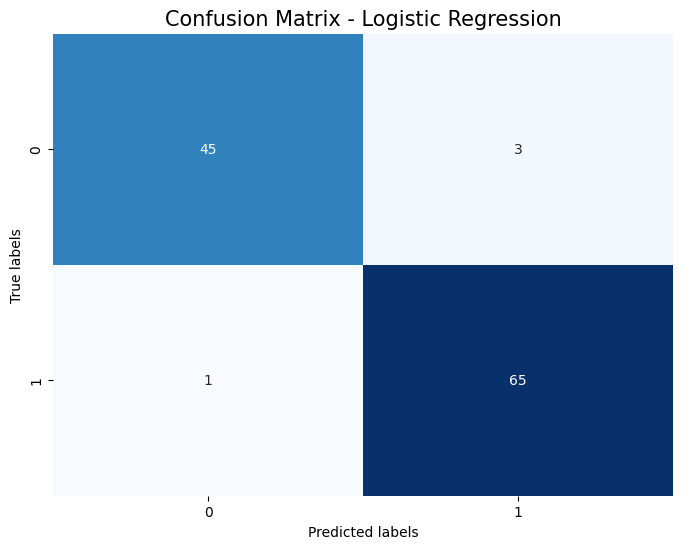

Accuracy: 96.49122807017544
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        48
         1.0       0.96      0.98      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix of Logistic Regression model: 
 [[45  3]
 [ 1 65]] 

Accuracy of Logistic Regression model =  0.9649122807017544


In [32]:
# import libraries
import pandas as pd # for data manupulation or analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import pickle

#Load breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

#print(cancer_dataset)
#print(cancer_dataset.keys())
#print(cancer_dataset['feature_names'])

# create datafrmae
cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'],cancer_dataset['target']],columns = np.append(cancer_dataset['feature_names'], ['target']))
cancer_df.to_csv('breast_cancer_dataframe.csv')

#print(cancer_df.head(6))
cancer_df.tail(6)
cancer_df.describe()
cancer_df.isnull().sum()

pairplot=sns.pairplot(cancer_df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )
pairplot.savefig('pairplot.png')
countplot=sns.countplot(data=cancer_df, x='target')
countplot.figure.savefig('countplot.png')
#sns.countplot(cancer_df['target'])

# input variable
X = cancer_df.drop(['target'], axis = 1)
X.head(6)

# output variable
y = cancer_df['target']
y.head(6)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

#feature scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#logistic regression
lr_classifier = LogisticRegression(random_state = 51, penalty = 'l1', solver='liblinear')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Logistic Regression', fontsize=15)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy*100)
print(classification_report(y_test, y_pred_lr))





# save model
pickle.dump(lr_classifier, open('breast_cancer_detector.pickle', 'wb'))

# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))

# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of Logistic Regression model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of Logistic Regression model = ',accuracy_score(y_test, y_pred))